In [227]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers

from sklearn.metrics import mean_absolute_error, mean_squared_error

tf.__version__

'2.11.0'

In [228]:
# Load dataset
csv_file = '../Dataset/dataset.csv'
dataframe = pd.read_csv(csv_file)
dataframe = dataframe.drop(dataframe.columns[0],axis=1) # remove first column (no information there)
dataframe.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,R,lambd
0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,3,3,861.9503,289.48
1,0,1,0,0,4,0,0,0,0,4,0,3,0,0,0,0,646.2645,286.47
2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,986.9448,277.39
3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,916.7423,278.03
4,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,962.5692,277.25


In [229]:
# Create a target variable
dataframe['target'] = dataframe['R']

# Drop unused features.
dataframe = dataframe.drop(columns=['R', 'lambd'])
dataframe.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,target
0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,3,3,861.9503
1,0,1,0,0,4,0,0,0,0,4,0,3,0,0,0,0,646.2645
2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,986.9448
3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,916.7423
4,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,962.5692


In [230]:
# Check overal statistis of each input feature 
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,76.0,0.276316,0.903308,0.0000,0.000000,0.000,0.000000,4.0000
Pos2,76.0,0.552632,1.226320,0.0000,0.000000,0.000,0.000000,4.0000
Pos3,76.0,0.513158,1.171818,0.0000,0.000000,0.000,0.000000,4.0000
Pos4,76.0,0.526316,1.113238,0.0000,0.000000,0.000,0.250000,4.0000
Pos5,76.0,0.539474,1.112844,0.0000,0.000000,0.000,0.250000,4.0000
Pos6,76.0,0.394737,1.059295,0.0000,0.000000,0.000,0.000000,4.0000
Pos7,76.0,0.223684,0.722933,0.0000,0.000000,0.000,0.000000,4.0000
Pos8,76.0,0.460526,1.100797,0.0000,0.000000,0.000,0.000000,4.0000
Pos9,76.0,0.500000,1.101514,0.0000,0.000000,0.000,0.000000,4.0000
Pos10,76.0,0.289474,0.891677,0.0000,0.000000,0.000,0.000000,4.0000


In [231]:
# normalize numerical targets

R_mean = dataframe['target'].mean()
R_std = dataframe['target'].std()

dataset = dataframe.copy()

dataset['target']=(dataset['target']-R_mean)/R_std

# Check overal statistis of each input feature 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,76.0,2.763158e-01,0.903308,0.00000,0.000000,0.000000,0.000000,4.00000
Pos2,76.0,5.526316e-01,1.226320,0.00000,0.000000,0.000000,0.000000,4.00000
Pos3,76.0,5.131579e-01,1.171818,0.00000,0.000000,0.000000,0.000000,4.00000
Pos4,76.0,5.263158e-01,1.113238,0.00000,0.000000,0.000000,0.250000,4.00000
Pos5,76.0,5.394737e-01,1.112844,0.00000,0.000000,0.000000,0.250000,4.00000
Pos6,76.0,3.947368e-01,1.059295,0.00000,0.000000,0.000000,0.000000,4.00000
Pos7,76.0,2.236842e-01,0.722933,0.00000,0.000000,0.000000,0.000000,4.00000
Pos8,76.0,4.605263e-01,1.100797,0.00000,0.000000,0.000000,0.000000,4.00000
Pos9,76.0,5.000000e-01,1.101514,0.00000,0.000000,0.000000,0.000000,4.00000
Pos10,76.0,2.894737e-01,0.891677,0.00000,0.000000,0.000000,0.000000,4.00000


In [232]:
# Shuffle the dataset
dataset = dataset.sample(frac=1,random_state=39).reset_index(drop=True)

# Split the dataframe into training, validation, and test sets

### IMPORTANT: Select for normalization
#train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
train, val, test = np.split(dataset.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

60 training examples
8 validation examples
8 test examples


In [233]:
# Create an input pipeline using tf.data

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

# Example: 
batch_size = 1
train_ds = df_to_dataset(train, batch_size=batch_size)

[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of Pos1:', train_features['Pos1'])
print('A batch of targets (R):', label_batch )

Every feature: ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 'Pos13', 'Pos14', 'Pos15', 'Pos16', 'target']
A batch of Pos1: tf.Tensor([[0]], shape=(1, 1), dtype=int64)
A batch of targets (R): tf.Tensor([-1.47403315], shape=(1,), dtype=float64)


/tmp/ipykernel_136080/3198051929.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [234]:
# Numerical columns preprocessing layer

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [235]:
# Categorical columns preprocessing layer

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [236]:
# Create an input pipeline
batch_size = 2
#train_ds = df_to_dataset(train, batch_size=batch_size)
train_ds = df_to_dataset(train, shuffle=False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/tmp/ipykernel_136080/3198051929.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [237]:
# Preprocess selected features (categorical and numerical)

all_inputs = []
encoded_features = []

# Multi-hot encoding and add the resulting feature inputs to encoded_features
categorical_cols = ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 
                    'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 
                    'Pos13', 'Pos14', 'Pos15', 'Pos16']
#categorical_cols= list(train_features.keys())
#categorical_cols = categorical_cols[0:16]
print("Categorical cols: "+str(categorical_cols))
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

# Normalize numerical features.
""" numeric_cols = ['X', 'Y', 'Z']
print("Numerical cols: "+str(numeric_cols))
for header in numeric_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col) """

""" numeric_cols = ['target']
print("Numerical cols: "+str(numeric_cols))
for header in numeric_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col) """

Categorical cols: ['Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 'Pos7', 'Pos8', 'Pos9', 'Pos10', 'Pos11', 'Pos12', 'Pos13', 'Pos14', 'Pos15', 'Pos16']


' numeric_cols = [\'target\']\nprint("Numerical cols: "+str(numeric_cols))\nfor header in numeric_cols:\n  numeric_col = tf.keras.Input(shape=(1,), name=header)\n  normalization_layer = get_normalization_layer(header, train_ds)\n  encoded_numeric_col = normalization_layer(numeric_col)\n  all_inputs.append(numeric_col)\n  encoded_features.append(encoded_numeric_col) '

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Pos1 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos2 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos3 (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Pos4 (InputLayer)              [(None, 1)]          0           []                               
                                                                                            

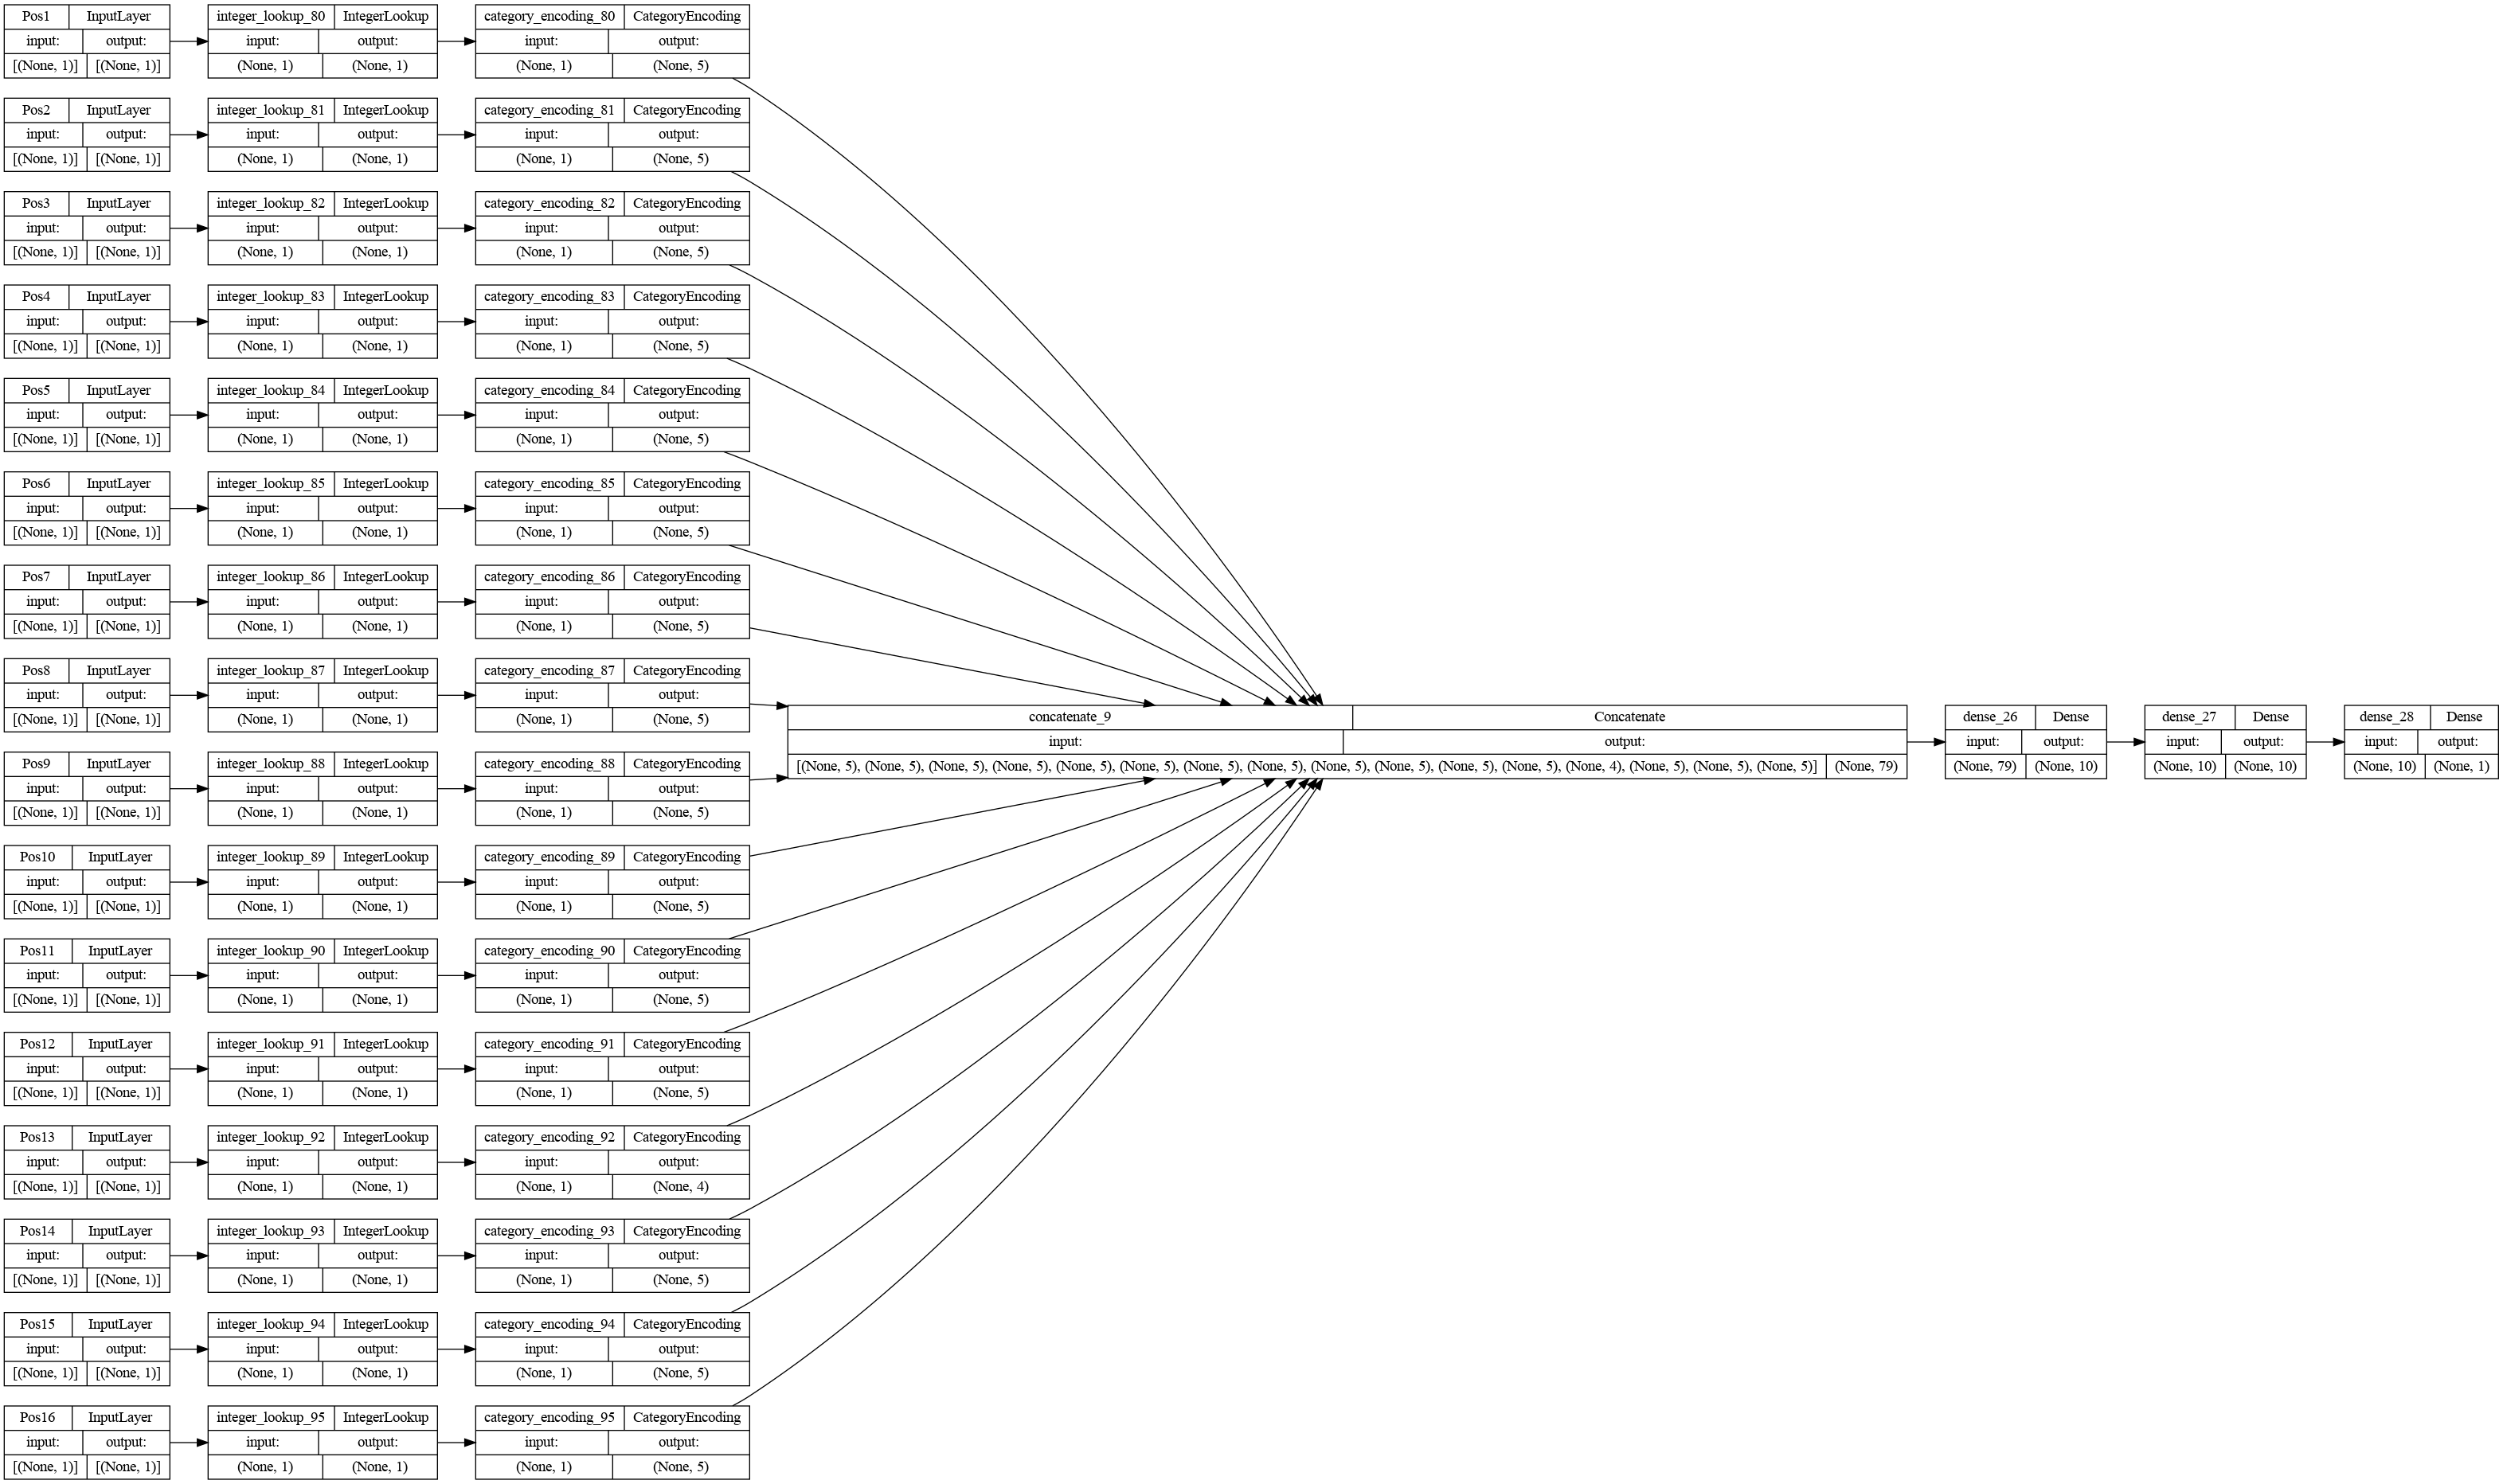

In [238]:
# Create the model architecture
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(10, activation="relu")(all_features)
#x = tf.keras.layers.Dense(512, activation="relu")(all_features)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
#x = tf.keras.layers.Dense(512, activation="relu")(x)
#x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.Dense(512, activation="relu")(x)
#x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)
model.summary()

#loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001)
# compile the model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              #loss=tf.keras.losses.MeanAbsoluteError(),
              #optimizer=tf.keras.optimizers.Adam(0.001),
              #metrics=["accuracy"])
)

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


In [239]:
# Train the model
#history = model.fit(train_ds, epochs=75, verbose=2, validation_data=val_ds)
#history = model.fit(train_ds, epochs=200, verbose=2, validation_data=val_ds)
#history = model.fit(train_ds, epochs=50, verbose=2, validation_data=val_ds)
#history = model.fit(train_ds, epochs=20, verbose=2, validation_data=val_ds)
#history = model.fit(train_ds, epochs=500, verbose=2, validation_data=val_ds)
history = model.fit(train_ds, epochs=200, verbose=2, validation_data=val_ds)


Epoch 1/200


/home/alfonso/Work/UGR/Calculations/Helicenes_GNNs/Helicenes_venv/lib/python3.10/site-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 - 2s - loss: 0.7512 - val_loss: 1.2333 - 2s/epoch - 56ms/step
Epoch 2/200
30/30 - 0s - loss: 0.7269 - val_loss: 1.2249 - 31ms/epoch - 1ms/step
Epoch 3/200
30/30 - 0s - loss: 0.7112 - val_loss: 1.2088 - 34ms/epoch - 1ms/step
Epoch 4/200
30/30 - 0s - loss: 0.6974 - val_loss: 1.1972 - 34ms/epoch - 1ms/step
Epoch 5/200
30/30 - 0s - loss: 0.6830 - val_loss: 1.1819 - 37ms/epoch - 1ms/step
Epoch 6/200
30/30 - 0s - loss: 0.6667 - val_loss: 1.1811 - 37ms/epoch - 1ms/step
Epoch 7/200
30/30 - 0s - loss: 0.6525 - val_loss: 1.1769 - 34ms/epoch - 1ms/step
Epoch 8/200
30/30 - 0s - loss: 0.6309 - val_loss: 1.1643 - 32ms/epoch - 1ms/step
Epoch 9/200
30/30 - 0s - loss: 0.5997 - val_loss: 1.1552 - 33ms/epoch - 1ms/step
Epoch 10/200
30/30 - 0s - loss: 0.5808 - val_loss: 1.1514 - 33ms/epoch - 1ms/step
Epoch 11/200
30/30 - 0s - loss: 0.5495 - val_loss: 1.1394 - 33ms/epoch - 1ms/step
Epoch 12/200
30/30 - 0s - loss: 0.5150 - val_loss: 1.1386 - 41ms/epoch - 1ms/step
Epoch 13/200
30/30 - 0s - loss: 0.4869

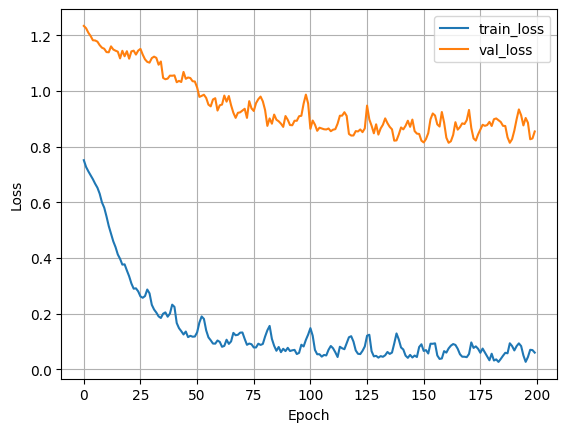

In [240]:
# Plot the loss

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [241]:
def plot_PredvsTrue(y_true, y_pred, n_stds=2):

    plt.figure(figsize=(3, 3), dpi=200)
    p1 = min(y_true)
    p2 = max(y_true)
    #p1 = 0
    #p2 = 64
    #p1 = max(max(y_pred), max(y_true))
    #p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
    plt.scatter(y_true,y_pred,color="blue",label="Model",s=6)
    plt.xlabel('True',fontsize=15)
    plt.ylabel('Pred',fontsize=15)
    plt.legend(loc="upper left")
    plt.show()

4/4 [==============================] - 0s 2ms/step
(8, 1)
(8, 1)
[[ 0.54274748]
 [-0.18232527]
 [ 0.62669528]
 [-0.61154643]
 [-0.59021439]
 [ 0.46125753]
 [ 1.71832884]
 [ 0.0762777 ]]
[[ 0.79086834]
 [-0.536018  ]
 [-0.01230185]
 [-0.0212162 ]
 [ 0.01501237]
 [ 0.36032224]
 [ 2.4779143 ]
 [-0.10716195]]


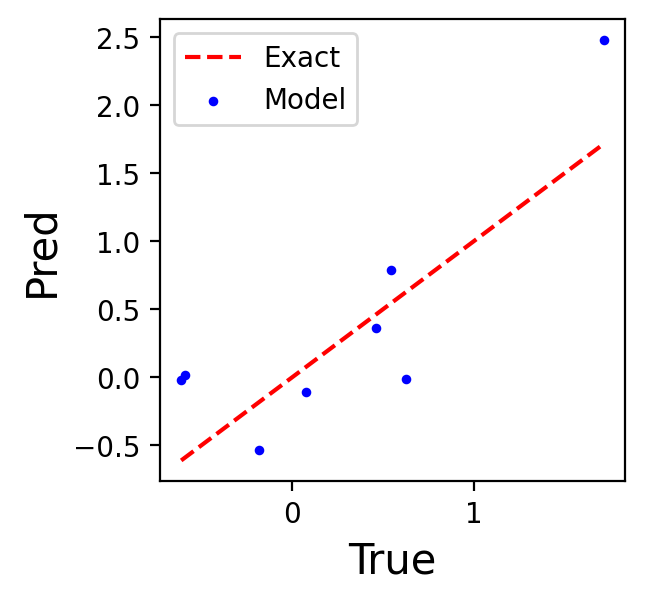

Test MAE: 0.43504102138372713


In [242]:
# Pred vs True values on test set 

y_pred = model.predict(test_ds)
y_pred.shape
y_true = np.zeros((len(test['target']),1))
y_true[:,0] = test['target']

print(y_true.shape)
print(y_pred.shape)
print(y_true)
print(y_pred)

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Test MAE: "+str(test_mae))

30/30 [==============================] - 0s 917us/step
(60, 1)
(60, 1)
[[ 0.52642497]
 [-1.21998176]
 [ 0.36916705]
 [-0.64073133]
 [ 0.30804029]
 [ 0.01587363]
 [ 0.49610682]
 [ 0.03378826]
 [ 0.27072944]
 [ 1.31451012]
 [ 0.40041502]
 [-0.74874954]
 [-0.74002909]
 [-1.30860747]
 [-1.47403315]
 [-0.01343574]
 [ 0.08940668]
 [-1.44627782]
 [ 0.49852566]
 [-1.60647011]
 [-0.0633424 ]
 [-0.2368383 ]
 [ 0.54775514]
 [ 0.25022783]
 [-0.13143771]
 [ 0.99032171]
 [ 0.07915262]
 [-1.49316928]
 [-0.00246087]
 [ 1.11680911]
 [ 1.55079735]
 [-1.38947135]
 [ 1.58853179]
 [ 1.57333509]
 [-0.55048377]
 [-1.50039978]
 [-1.15820757]
 [ 0.96843049]
 [-0.6343972 ]
 [-0.46389326]
 [ 2.14877428]
 [ 0.40009455]
 [-1.74029763]
 [-1.96970269]
 [ 2.02491936]
 [ 0.15238843]
 [-0.02238935]
 [ 0.35826555]
 [-0.04804259]
 [ 0.30176655]
 [-0.16615788]
 [ 0.34941134]
 [-0.58976109]
 [-0.44946291]
 [ 0.21811413]
 [ 0.07067647]
 [-0.87779883]
 [ 0.69450078]
 [-1.44627874]
 [-0.20385794]]
[[ 0.65211093]
 [-1.1480222 

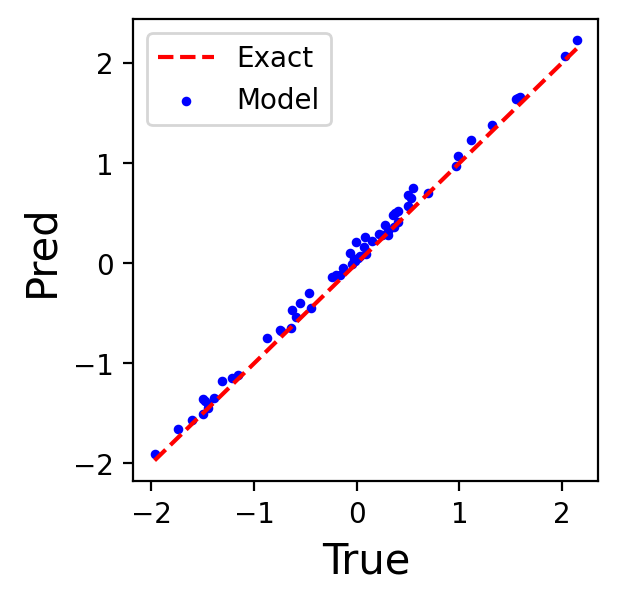

Train MAE: 0.0789701622991594


In [243]:
# Pred vs True values on training set 

y_pred = model.predict(train_ds)
y_pred.shape
y_true = np.zeros((len(train['target']),1))
y_true[:,0] = train['target']

print(y_true.shape)
print(y_pred.shape)
print(y_true)
print(y_pred)

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Train MAE: "+str(test_mae))

True: [[ 914.9851]
 [ 726.9757]
 [ 898.0555]
 [ 789.3349]
 [ 891.4749]
 [ 860.0217]
 [ 911.7212]
 [ 861.9503]
 [ 887.4582]
 [ 999.8264]
 [ 901.4195]
 [ 777.7062]
 [ 778.645 ]
 [ 717.4347]
 [ 699.6258]
 [ 856.8664]
 [ 867.9379]
 [ 702.6138]
 [ 911.9816]
 [ 685.3683]
 [ 851.4937]
 [ 832.816 ]
 [ 917.2814]
 [ 885.2511]
 [ 844.1629]
 [ 964.9259]
 [ 866.834 ]
 [ 697.5657]
 [ 858.0479]
 [ 978.5429]
 [1025.2639]
 [ 708.7293]
 [1029.3262]
 [1027.6902]
 [ 799.0505]
 [ 696.7873]
 [ 733.626 ]
 [ 962.5692]
 [ 790.0168]
 [ 808.3724]
 [1089.6391]
 [ 901.385 ]
 [ 670.9611]
 [ 646.2645]
 [1076.3055]
 [ 874.7182]
 [ 855.9025]
 [ 896.8819]
 [ 853.1408]
 [ 890.7995]
 [ 840.4251]
 [ 895.9287]
 [ 794.8221]
 [ 809.9259]
 [ 881.7939]
 [ 865.9215]
 [ 763.8134]
 [ 933.0793]
 [ 702.6137]
 [ 836.3665]]
Pred: [[ 928.5158 ]
 [ 734.7225 ]
 [ 912.1456 ]
 [ 788.4379 ]
 [ 888.34326]
 [ 863.4575 ]
 [ 931.11865]
 [ 866.215  ]
 [ 899.81055]
 [1007.1073 ]
 [ 902.73334]
 [ 786.48456]
 [ 785.34985]
 [ 731.15955]
 [ 709.8370

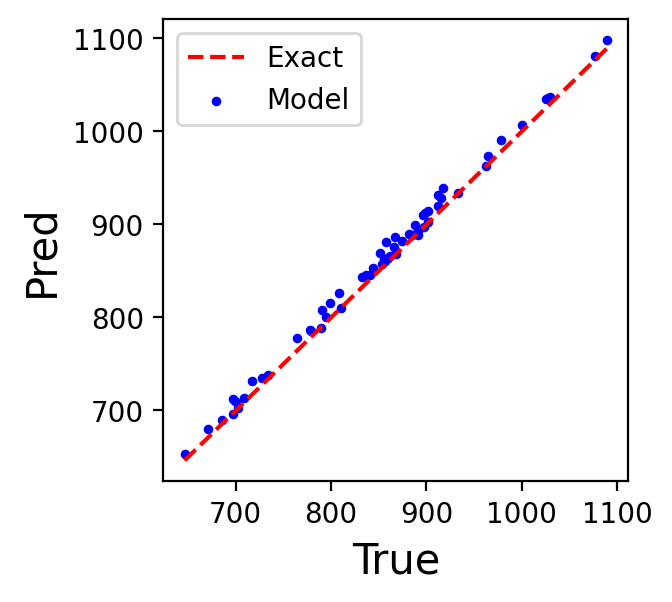

Train MAE (non-normalized): 8.501517067057295


In [244]:
# Evaluate the model with non-normalized units

y_true = y_true * R_std + R_mean
y_pred = y_pred * R_std + R_mean

print("True: "+str(y_true))
print("Pred: "+str(y_pred))

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
print("Train MAE (non-normalized): "+str(test_mae))

In [246]:
# save model

model.save('R_good')
#reloaded_model = tf.keras.models.load_model('R_model')

INFO:tensorflow:Assets written to: R_good/assets


INFO:tensorflow:Assets written to: R_good/assets


In [112]:
#[(train_features, label_batch)] = train_ds.take(1)
#print(train_features['Pos2'][0])

4/4 [==============================] - 0s 2ms/step


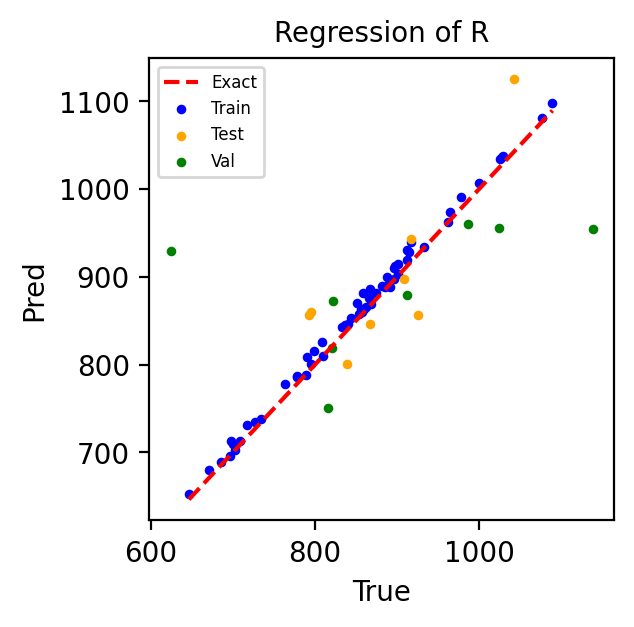

train MAE (non-normalized): 8.501517067057295
test MAE (non-normalized): 46.83432996826173
val MAE (non-normalized): 91.97367241210938


In [247]:
# Evaluate the model with non-normalized units on the whole dataset

y_pred_test = model.predict(test_ds)
y_true_test = np.zeros((len(test['target']),1))
y_true_test[:,0] = test['target']

y_pred_train = model.predict(train_ds)
y_true_train = np.zeros((len(train['target']),1))
y_true_train[:,0] = train['target']

y_pred_val = model.predict(val_ds)
y_true_val = np.zeros((len(val['target']),1))
y_true_val[:,0] = val['target']

y_true_test = y_true_test * R_std + R_mean
y_pred_test = y_pred_test * R_std + R_mean
y_true_test = y_true_test.ravel()
y_pred_test = y_pred_test.ravel()

y_true_train = y_true_train * R_std + R_mean
y_pred_train = y_pred_train * R_std + R_mean
y_true_train = y_true_train.ravel()
y_pred_train = y_pred_train.ravel()

y_true_val = y_true_val * R_std + R_mean
y_pred_val = y_pred_val * R_std + R_mean
y_true_val = y_true_val.ravel()
y_pred_val = y_pred_val.ravel()

plt.figure(figsize=(3, 3), dpi=200)
plt.title("Regression of R",fontsize=10)
p1 = min(y_true_train)
p2 = max(y_true_train)
plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
plt.scatter(y_true_train,y_pred_train,color="blue",label="Train",s=6)
plt.scatter(y_true_test,y_pred_test,color="orange",label="Test",s=6)
plt.scatter(y_true_val,y_pred_val,color="green",label="Val",s=6)
plt.xlabel('True',fontsize=10)
plt.ylabel('Pred',fontsize=10)
plt.legend(loc="upper left",prop={'size': 6})
plt.show()

train_mae = mean_absolute_error(y_true_train,y_pred_train)
print("train MAE (non-normalized): "+str(train_mae))
test_mae = mean_absolute_error(y_true_test,y_pred_test)
print("test MAE (non-normalized): "+str(test_mae))
val_mae = mean_absolute_error(y_true_val,y_pred_val)
print("val MAE (non-normalized): "+str(val_mae))

In [258]:
y_pred = np.concatenate((y_pred_train,y_pred_test,y_pred_val))
y_true = np.concatenate((y_true_train,y_true_test,y_true_val))
#print(y_true.shape)
#print(y_pred.shape)
#print(y_true)
#print(y_pred)
y_true = y_true.ravel()
y_pred = y_pred.ravel()
#print("True: "+str(y_true))
#print("Pred: "+str(y_pred))

# explore data

data = dataset.to_numpy()

#print()
print("Data id, nº halogens, y_true, y_pred, abs(y_pred-y_true)")

error_nhalogens = np.zeros(4)
num_nhalogens = np.zeros(4)
error_halogentype = np.zeros(4)
num_halogentype = np.zeros(4)

for i in range(len(y_pred)):
    diff = abs(y_pred[i]-y_true[i])
    x_data = data[i,0:15]
    n_halogens = np.count_nonzero(x_data)
    #print(data[i,0:15])
    #print(n_halogens)

    error_nhalogens[n_halogens-1] = error_nhalogens[n_halogens-1] + diff
    num_nhalogens[n_halogens-1] = num_nhalogens[n_halogens-1] + 1

    print(str(i)+"  "+str(n_halogens)+"  "+str(y_true[i])+"  "+str(y_pred[i])+"  "+str(diff))


error_nhalogens[:] = error_nhalogens[:] / num_nhalogens[:]
print()
print("Mean Absolute Error (MAE) according to nº halogens: 1 halogen, 2 halogens, 3 halogens, 4 halogens")
print(error_nhalogens)

Data id, nº halogens, y_true, y_pred, abs(y_pred-y_true)
0  3  914.9851  928.5158  13.530708105468761
1  2  726.9757  734.7225  7.746773144531289
2  2  898.0555  912.1456  14.090129882812448
3  3  789.3349  788.4379  0.8969727539061978
4  1  891.4749  888.34326  3.131638281250048
5  4  860.0217  863.4575  3.43581953124999
6  1  911.7212  931.11865  19.397452343750047
7  2  861.9503  866.215  4.26472685546878
8  2  887.4582  899.81055  12.352346874999967
9  4  999.8264  1007.1073  7.280899804687465
10  2  901.4195  902.73334  1.313837402343779
11  2  777.7062  786.48456  8.778358105468783
12  3  778.645  785.34985  6.704853515625018
13  3  717.4347  731.15955  13.72484589843748
14  3  699.6258  709.83704  10.211236132812473
15  3  856.8664  860.3582  3.4918153320312513
16  2  867.9379  868.6104  0.6725125976562367
17  3  702.6138  707.38855  4.774749804687531
18  4  911.9816  919.74115  7.759549902343792
19  2  685.3683  689.23  3.8616804687500235
20  1  851.4937  869.74524  18.25153925